# Qualitative analysis and Bifurcation diagram Tutorial

*This tutorial assumes you have read the [tutorial on numerical integration](http://nbviewer.ipython.org/github/diogro/ode_examples/blob/master/Numerical%20Integration%20Tutorial.ipynb?create=1).*

## Exploring the parameter space: bifurcation diagrams

Bifurcation diagrams represent the (long-term) solutions of a model as a function of some key variable. The idea is that, as this parameter changes, the solutions change in a "well-behaved" way, and that helps us understand better the general behavior of the model.

In this tutorial, we are going to study a simple predator-prey model (the Rosenzweig-MacArthur), and see how the amount of resources for prey ($K$) changes the dynamics.

### The Rosenzweig-MacArthur consumer-resource model

This model is expressed as:

$$ \begin{aligned}
\frac{dR}{dt} &= rR \left( 1 - \frac{R}{K} \right) - \frac{a R C}{1+ahR} \\
\frac{dC}{dt} &= \frac{e a R C}{1+ahR} - d C
\end{aligned} $$

#### Rosenzweig–MacArthur model solutions

We use the same method as before to integrate this model numerically:

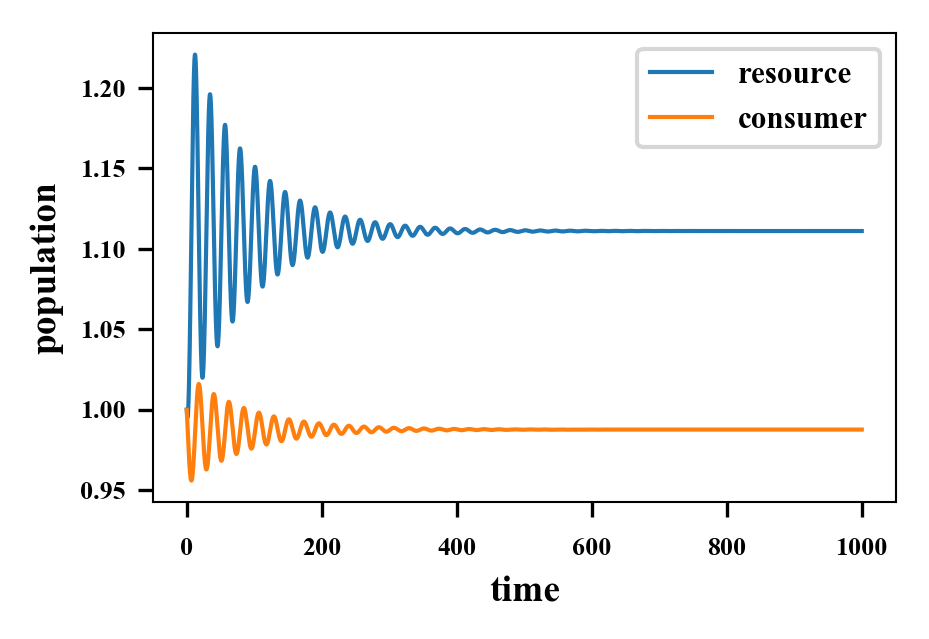

In [12]:
%matplotlib inline
from numpy import *
from scipy.integrate import odeint
from matplotlib.pyplot import *
ion()

def RM(y, t, r, K, a, h, e, d):
    return array([ y[0] * ( r*(1-y[0]/K) - a*y[1]/(1+a*h*y[0]) ),
                   y[1] * (e*a*y[0]/(1+a*h*y[0]) - d) ])

t = arange(0, 1000, .1)
y0 = [1, 1.]
pars =  (1., 10, 1., 0.1, 0.1, 0.1)

y = odeint(RM, y0, t, pars)
plot(t, y)
xlabel('time')
ylabel('population')
legend(['resource', 'consumer'])

For the parameters chosen above, the long-term (asymptotic) solution is a fixed point. Let's see this in the phase space, that is, the space of Predators ($P$) vs. Prey ($V$). We note that the arrows are "circulating", but always point inwards, and so the trajectory moves toward the middle, to the fixed point.

Text(0, 0.5, 'Consumer')

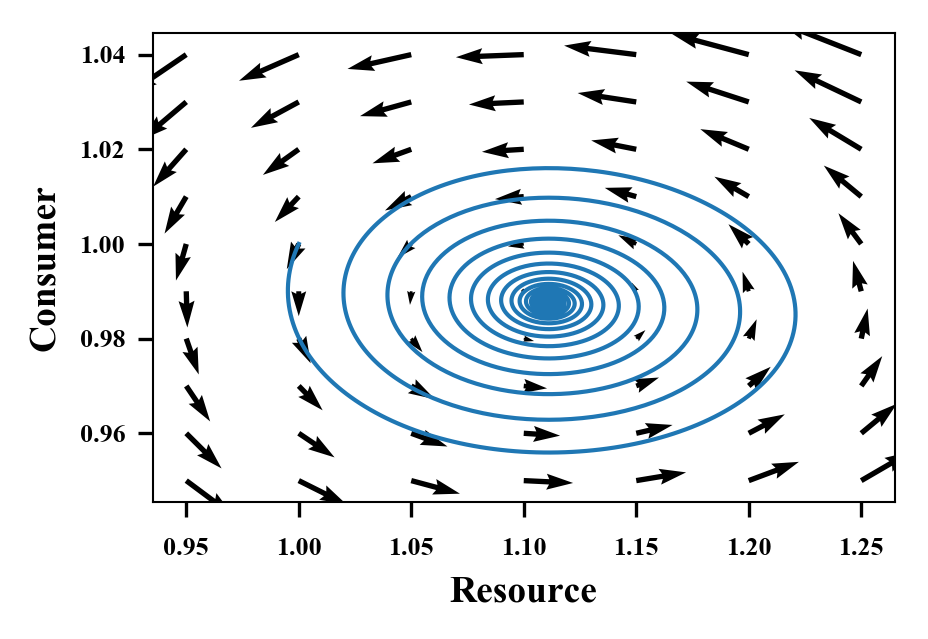

In [2]:
# plot the solution in the phase space
plot(y[:,0], y[:,1])
# defines a grid of points
R, C = meshgrid(arange(0.95, 1.25, .05), arange(0.95, 1.04, 0.01))
# calculates the value of the derivative at the point in the grid
dy = RM(array([R, C]), 0, *pars)
# plots arrows on the points of the grid, with the difection 
# and length determined by the derivative dy
# This is a picture of the flow of the solution in the phase space
quiver(R, C, dy[0,:], dy[1,:], scale_units='xy', angles='xy')
xlabel('Resource')
ylabel('Consumer')

#### Messing a little with the parameters...

Increasing the carrying capacity $K$ from $10$ to $15$, we now see oscillations...

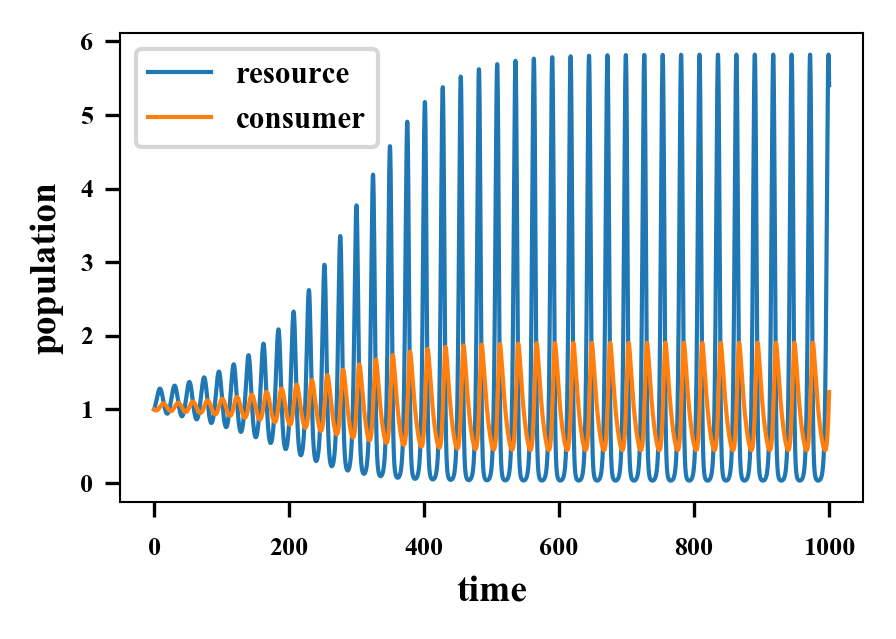

In [3]:
# now K = 15
t = arange(0, 1000, .1)
pars =  (1., 15., 1., 0.1, 0.1, 0.1)
y_osc = odeint(RM, y0, t, pars)
plot(t, y_osc)
xlabel('time')
ylabel('population')
legend(['resource', 'consumer'])

And, looking again at the phase space plot, we now see that the flux (the arrows) inside circles outwards, towards a limit cycle, and the arrows outside points inwards. The limit cycle corresponds to the periodic solution we just saw.

Text(0, 0.5, 'C')

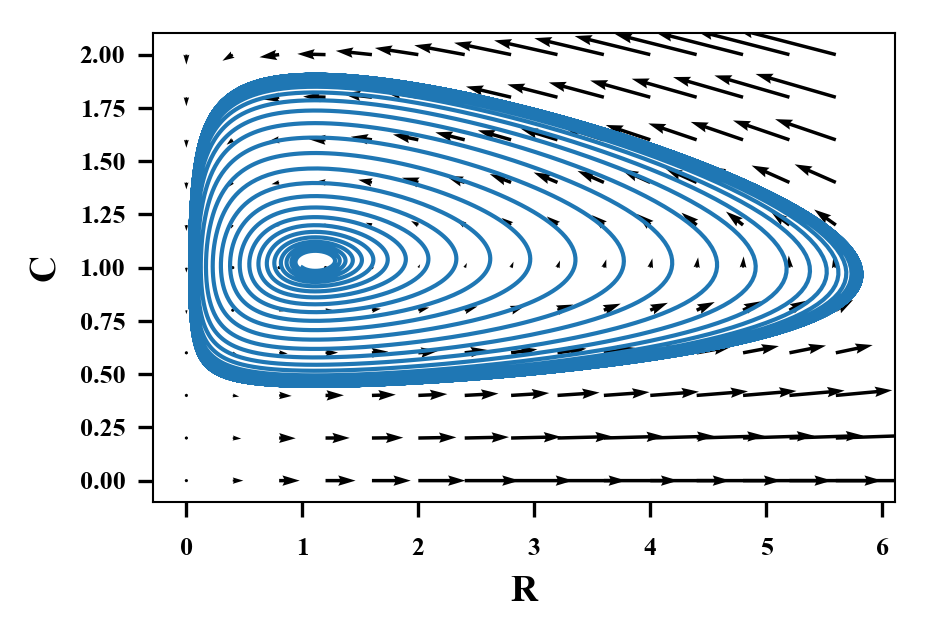

In [4]:
plot(y_osc[:,0], y_osc[:,1])
R, C = meshgrid(arange(0, 6., .4), arange(0, 2.1, 0.2))
dy = RM(array([R, C]), 0, *pars)
quiver(R, C, dy[0,:], dy[1,:], scale_units='xy', angles='xy')
xlabel('R')
ylabel('C')

### The bifurcation diagram

We have seen the solutions for two values of $K$, $10$ and $15$, so we want to plot those as a function of $K$. In the second case, there are oscilations, so instead of taking all of the solution, we just pick the minimum and maximum of the solution (after a long time). When the solution is a fixed point, the minimum and maximum should coincide.

Text(0, 0.5, 'min / max population')

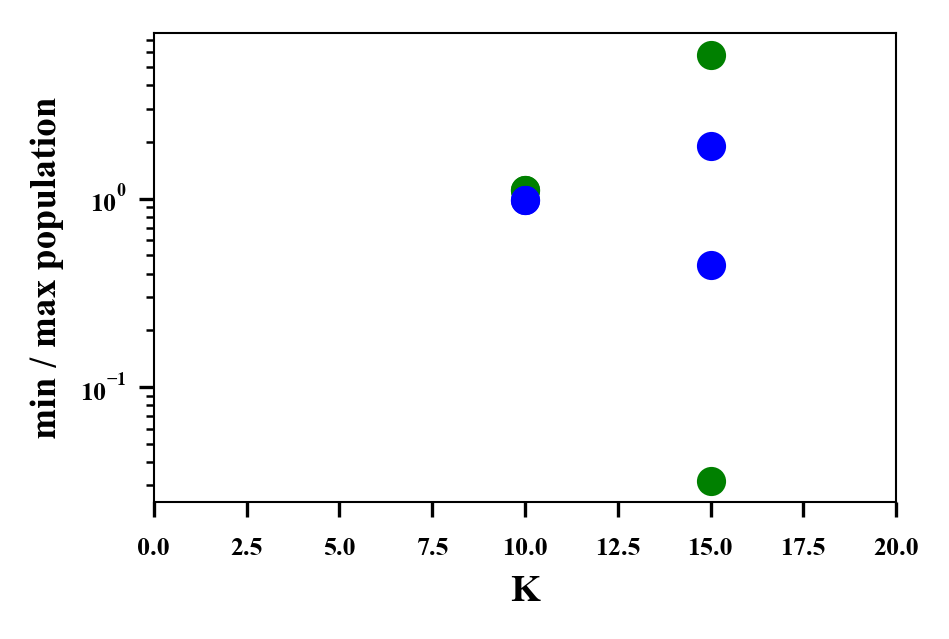

In [5]:
plot(10., y[-500:,0].min(), 'og')
plot(10., y[-500:,0].max(), 'og')
plot(10., y[-500:,1].min(), 'ob')
plot(10., y[-500:,1].max(), 'ob')
plot(15., y_osc[-500:,0].min(), 'og')
plot(15., y_osc[-500:,0].max(), 'og')
plot(15., y_osc[-500:,1].min(), 'ob')
plot(15., y_osc[-500:,1].max(), 'ob')
xlim((0, 20))
yscale('log')
xlabel('K')
ylabel('min / max population')

This is a very poor bifurcation diagram: it has only two points in $K$! Let's try with many values of $K$.

What happens when we change the carrying capacity $K$ from very small values up to very large values? For very small values, the resource is not going to sustain the consumer population, but for larger values ok $K$, both species should be benefited... right?

In [6]:
## this block calculates solutions for many K's, it should take some time
# empty lists to append the values later
ymin = []
ymax = []
KK = arange(.5, 25, .5)
t = arange(0, 6000, 1.)
# loop over the values of K (KK)
for K in KK:
    # redefine the parameters using the new K
    pars =  (1., K, 1., 0.1, 0.1, 0.1)
    # integrate again the equation, with new parameters
    y = odeint(RM, y0, t, pars)
    # calculate the minimum and maximum of the populations, but
    # only for the last 1000 steps (the long-term solution),
    # appending the result to the list
    # question: is 1000 enough? When it wouldn't be?
    ymin.append(y[-1000:,:].min(axis=0))
    ymax.append(y[-1000:,:].max(axis=0))
# convert the lists into arrays
ymin = array(ymin)
ymax = array(ymax)

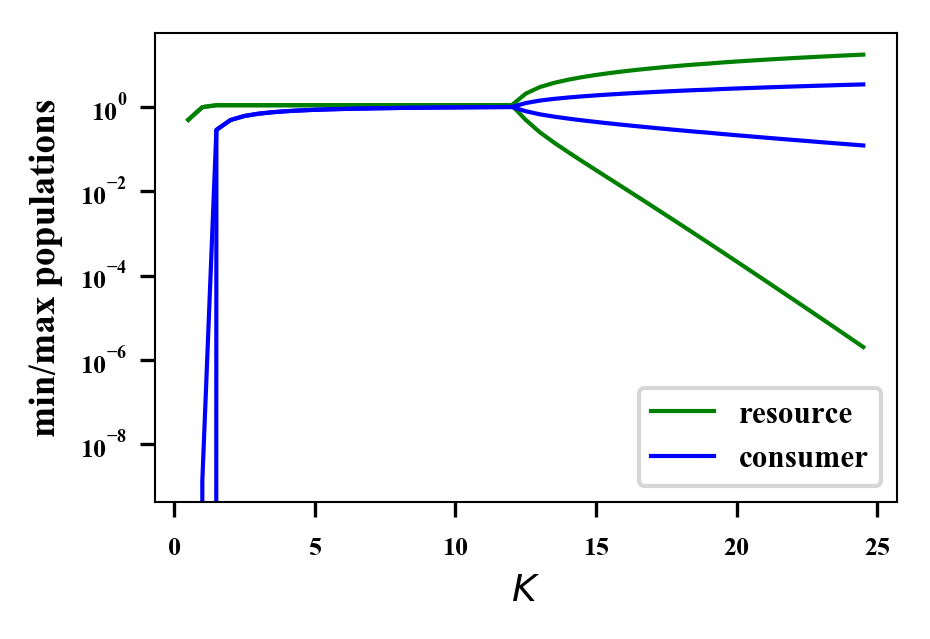

In [8]:
# and now, we plot the bifurcation diagram
plot(KK, ymin[:,0], 'g', label='resource')
plot(KK, ymax[:,0], 'g')
plot(KK, ymin[:,1], 'b', label='consumer')
plot(KK, ymax[:,1], 'b')
xlabel('$K$')
ylabel('min/max populations')
legend(loc='best')
# use a log scale in the y-axis
yscale('log')

Well, the first prediction was OK (notice that the plot above uses a log scale), but for high $K$, the minima of the oscillation go to very low values, so that the populations have a high risk of extinction. This phenomenon is the so-called **paradox of enrichment**.



### Consumer-resource dynamics in a seasonal environment

A special type of bifurcation diagram can be used when we have parameters that oscilate with time, and we want to see how this interacts with the system. Let's consider the Rosenzweig-MacArthur equations again, but now we make $r$, the growth rate of the prey, oscilate sinusoidally in time:

$$ \begin{aligned}
\frac{dR}{dt} &= r(t) R \left( 1 - \frac{R}{K} \right) - \frac{a R C}{1+ahR} \\
\frac{dC}{dt} &= \frac{e a R C}{1+ahR} - d C \\
r(t) &= r_0 (1+\alpha \sin(2\pi t/T))
\end{aligned} $$

We integrate this in the usual manner:

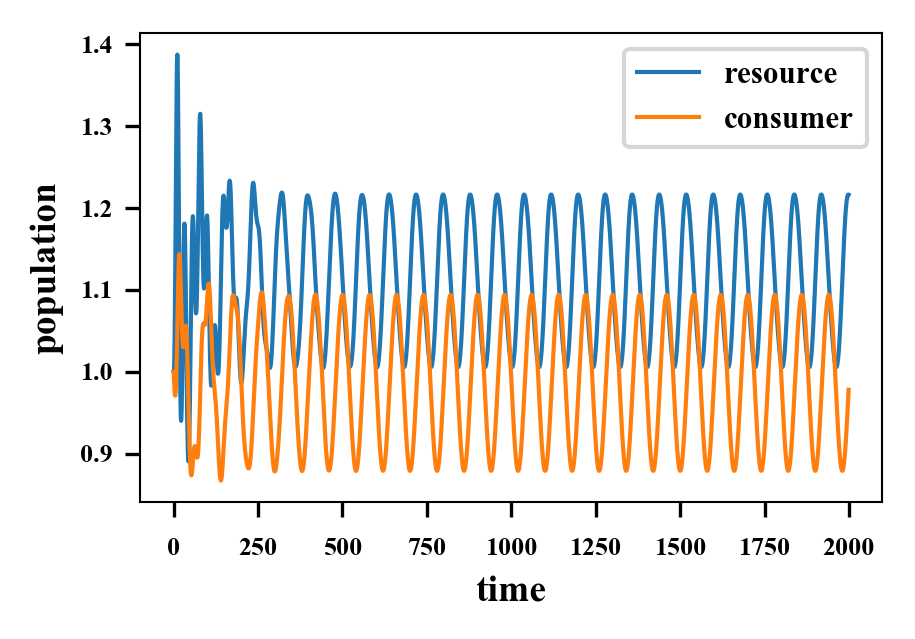

In [9]:
def RM_season(y, t, r, alpha, T, K, a, h, e, d):
    # in this function, `t` appears explicitly
    return array([ y[0] * ( r * (1+alpha*sin(2*pi*t/T)) *
                           (1-y[0]/K) - a*y[1]/(1+a*h*y[0]) ),
    y[1] * (e*a*y[0]/(1+a*h*y[0]) - d) ])

t = arange(0, 2000, 1.)
y0 = [1., 1.]
pars =  (1., 0.1, 80., 10., 1., 0.1, 0.1, 0.1)
y = odeint(RM_season, y0, t, pars)
plot(t, y)
xlabel('time')
ylabel('population')
legend(['resource', 'consumer'])

Notice that, even with small $K$, the solutions oscilate due to the oscilation of $r(t)$.

Now we use a tool that is an all-time favorite of physicists: the resonance diagram. It works exactly as a bifurcation diagram, but the parameter that is changed is the period (or frequency) of the external oscilation.

In [10]:
ymin = []
ymax = []
t = arange(0, 6000, 1.) # times
TT = arange(1, 80, 2) # periods
for T in TT:
    pars =  (1., 0.1, T, 10., 1., 0.1, 0.1, 0.1)
    y = odeint(RM_season, y0, t, pars)
    ymin.append(y[-1000:,:].min(axis=0))
    ymax.append(y[-1000:,:].max(axis=0))
ymin = array(ymin)
ymax = array(ymax)

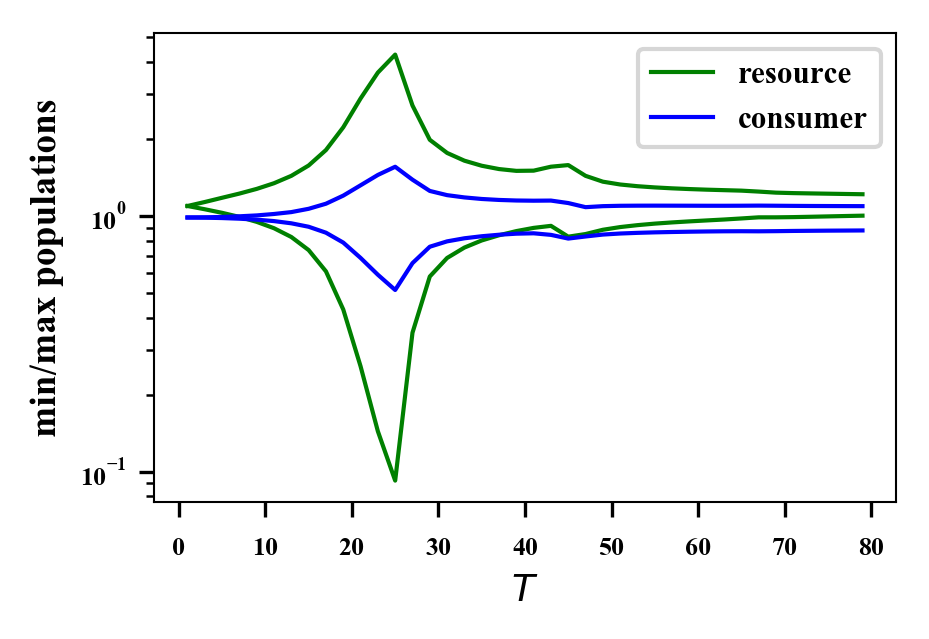

In [11]:
plot(TT, ymin[:,0], 'g', label='resource')
plot(TT, ymax[:,0], 'g')
plot(TT, ymin[:,1], 'b', label='consumer')
plot(TT, ymax[:,1], 'b')
xlabel('$T$')
ylabel('min/max populations')
legend(loc='best')
yscale('log')

We see a strong peak! (remember that this is a log scale). The frequency at which this peak occurs is the **resonant frequency** of the system, and is related to the natural frequency of the system (that exists even when it goes to a fixed point with constant parameters!). The external oscilation excites the natural frequency and drives large amplitude cycles, just like when we push a seesaw (ou gangorra, o balancín).

## What if I really want to explore a 10-dimensional parameter space?

First: good luck. Second, you will probably have to sample the space, rather than go through the whole thing. The recommended method to do it is using so-called [Latin Hypercube samples](http://en.wikipedia.org/wiki/Latin_hypercube_sampling), that uses a random sampling while ensuring a roughly regularly-spaced distribution. Notice, though, that this method is a way to sample the parameter space and do useful statistics with it, so the result will only make sense if you know how to properly interpret the outcomes. That said, there are implementations for both R and python:

* [R-Cran pse: Parameter space exploration](http://cran.r-project.org/web/packages/pse/)
* [PyDOE: design of experiments for Python](http://pythonhosted.org/pyDOE/randomized.html)